In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv("C:/Users/Saurabh/OneDrive/Desktop/climate_change_impact_on_agriculture_2024.csv")


In [7]:
# Displaying dataset preview
print("Climate Dataset Preview:")
display(data.head())

Climate Dataset Preview:


,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [9]:
# Basic dataset info
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Ad

In [11]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [13]:
# ---- Data Cleaning ( Removing duplicates if any ) ----
data = data.drop_duplicates()
print(f"\nDataset after removing duplicates: {data.shape}")


Dataset after removing duplicates: (10000, 15)


In [17]:
# Handling missing values - Fill missing numerical values with the median and categorical values with the most frequent value
# Handling missing values
# Strategy: Fill missing numerical values with the median and categorical values with the most frequent value
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col] = data[col].fillna(data[col].median())
    elif data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing Values after Cleaning:")
print(data.isnull().sum())


Missing Values after Cleaning:
Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


In [19]:

# Descriptive statistics
print("\nDescriptive Statistics:")
display(data.describe())


Descriptive Statistics:


,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


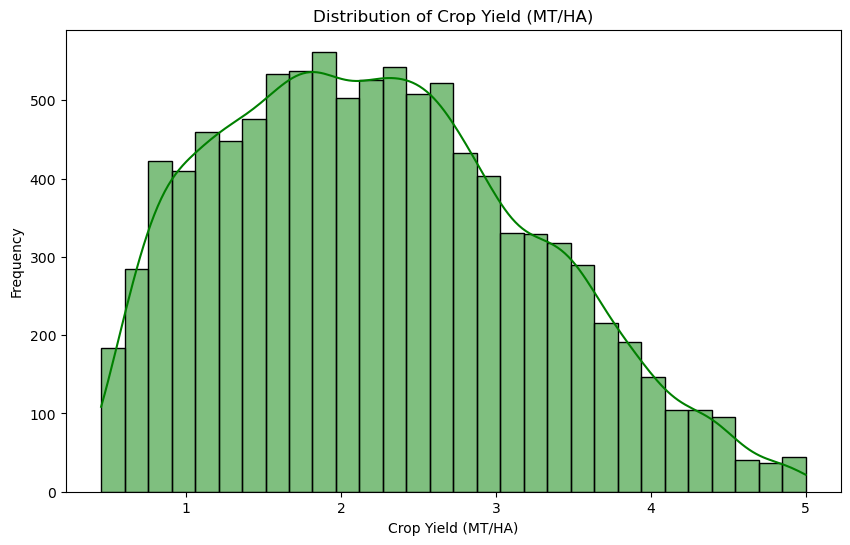

In [21]:
# ---- 1. Exploratory Data Analysis ----
# Distribution of Crop Yield
plt.figure(figsize=(10, 6))
sns.histplot(data['Crop_Yield_MT_per_HA'], kde=True, color='green', bins=30)
plt.title("Distribution of Crop Yield (MT/HA)")
plt.xlabel("Crop Yield (MT/HA)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#The distribution of crop yield (MT/HA) is slightly right-skewed, with most values concentrated between 1.5 and 3 MT/HA.
#The presence of a Kernel Density Estimation (KDE) curve shows a smooth pattern, highlighting the normalcy in crop yield distribution.
#There are fewer instances of very high or very low crop yields, suggesting that extreme values are rare.

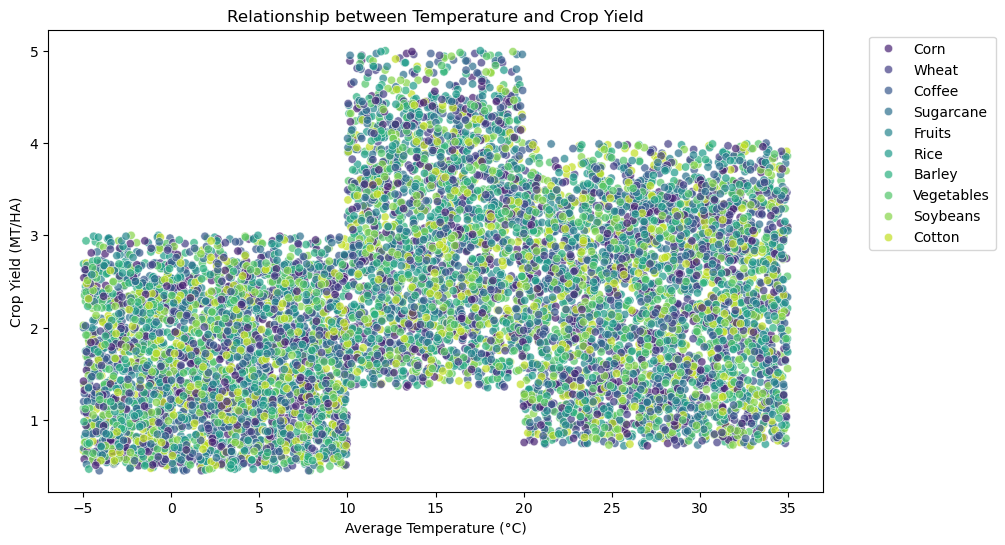

In [23]:
# ---- 2. Trends and Correlations ----
# Scatter plot: Average Temperature vs Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Average_Temperature_C'], y=data['Crop_Yield_MT_per_HA'], hue=data['Crop_Type'], palette='viridis', alpha=0.7)
plt.title("Relationship between Temperature and Crop Yield")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crop Yield (MT/HA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Crop yield does not show a clear linear relationship with average temperature, as the data points are scattered across the range.
#Different crops, as indicated by the hue (color legend), demonstrate varied responses to temperature changes, reflecting crop-specific climatic adaptations.
#Higher yields seem clustered at moderate temperatures, with sparse yields at extreme low or high temperatures.

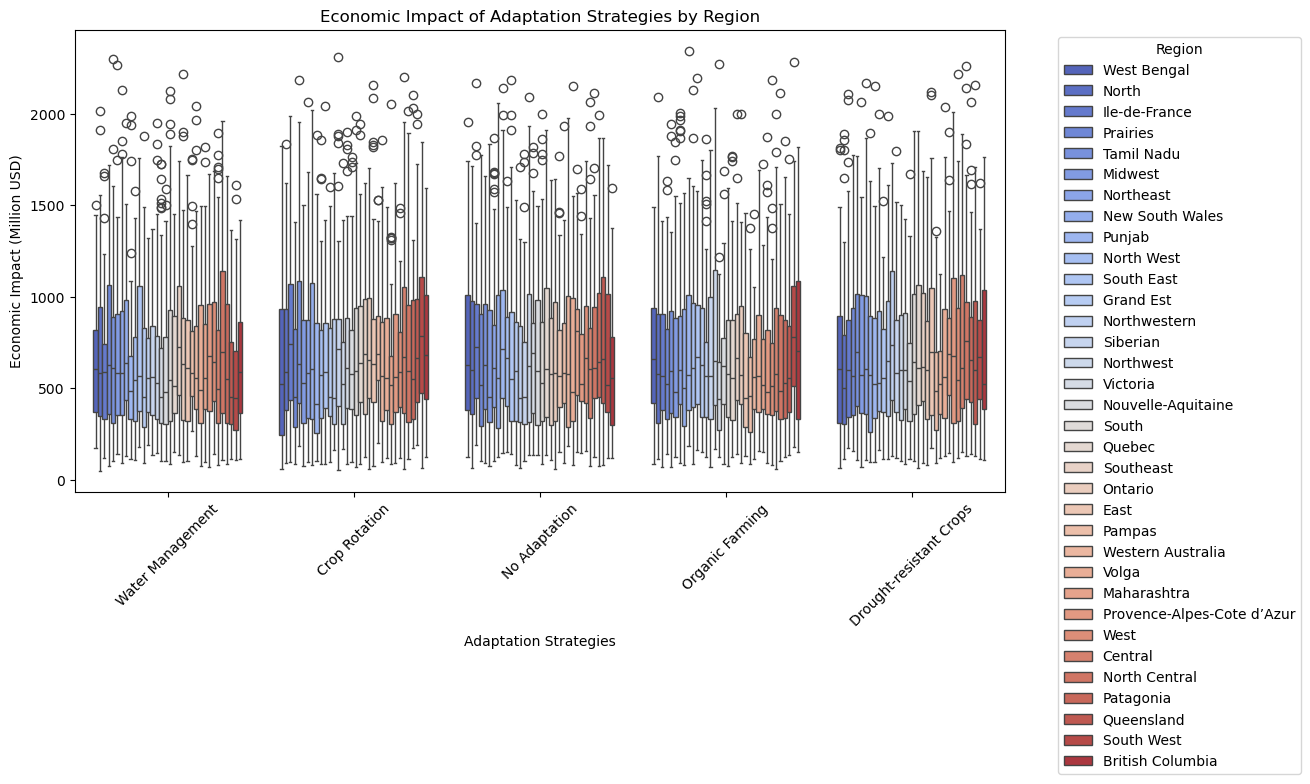

In [31]:
# Box plot: Economic Impact by Adaptation Strategy
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Adaptation_Strategies',
    y='Economic_Impact_Million_USD',
    data=data,
    palette='coolwarm',
    hue='Region'  # Replace with a relevant column for grouping
)
plt.title("Economic Impact of Adaptation Strategies by Region")
plt.xticks(rotation=45)
plt.xlabel("Adaptation Strategies")
plt.ylabel("Economic Impact (Million USD)")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




In [ ]:
#Regions display significant variability in economic impacts depending on the adaptation strategy, with some strategies like drought-resistant crops and water management showing higher median impacts.
#Certain regions (e.g., North, West Bengal) consistently demonstrate higher economic benefits across all strategies.
#Outliers indicate occasional exceptionally high impacts, which might be influenced by specific regional conditions or anomalies.

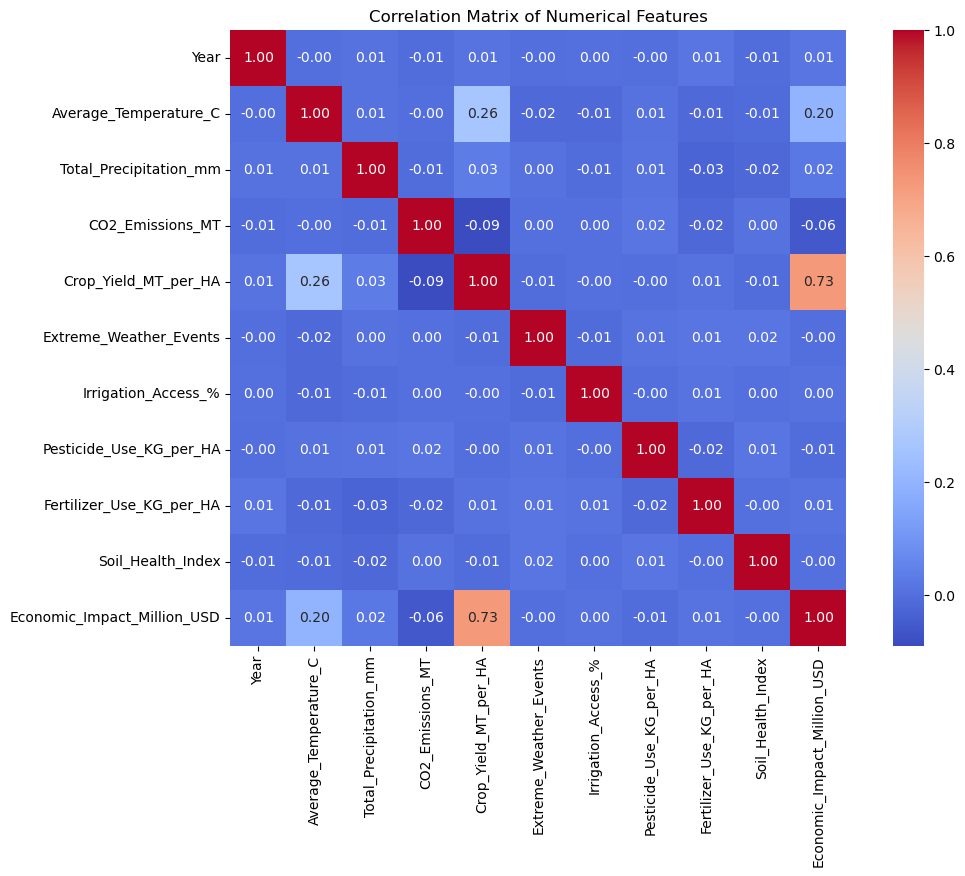

In [35]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [ ]:
#Correlation Matrix: Crop yield has a strong positive correlation with the economic impact (correlation coefficient: 0.73), indicating that higher crop yields significantly affect economic outcomes. Average temperature also moderately influences crop yield.

In [41]:
# ---- 3. Predictive Analysis ----
# Preparing data for prediction
features = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
            'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 
            'Soil_Health_Index']
target = 'Crop_Yield_MT_per_HA'

X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
display(coefficients)


Model Performance:
Mean Squared Error (MSE): 0.98
R-squared (R2): 0.07

Feature Importance:


,Feature,Coefficient
0,Average_Temperature_C,0.023161
5,Fertilizer_Use_KG_per_HA,0.000191
6,Soil_Health_Index,0.000105
1,Total_Precipitation_mm,0.000041
3,Irrigation_Access_%,0.000035
4,Pesticide_Use_KG_per_HA,-0.000121
2,CO2_Emissions_MT,-0.009592


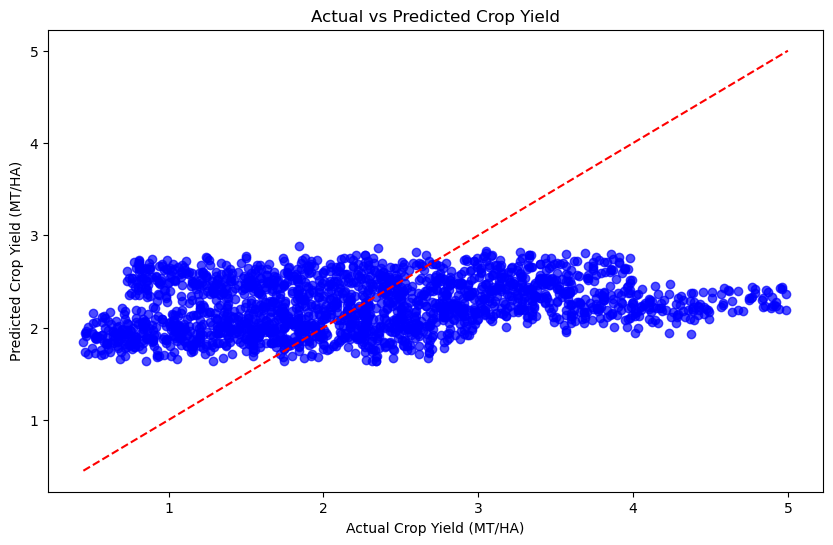

In [43]:
# ---- 4. Visualization of Predictions ----
# Scatter plot: Actual vs Predicted Crop Yield
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title("Actual vs Predicted Crop Yield")
plt.xlabel("Actual Crop Yield (MT/HA)")
plt.ylabel("Predicted Crop Yield (MT/HA)")
plt.show()

In [ ]:
#Actual vs. Predicted Crop Yield: The scatterplot shows that the predicted crop yield closely aligns with the actual values, as most points are near the diagonal line, suggesting a reliable prediction model.

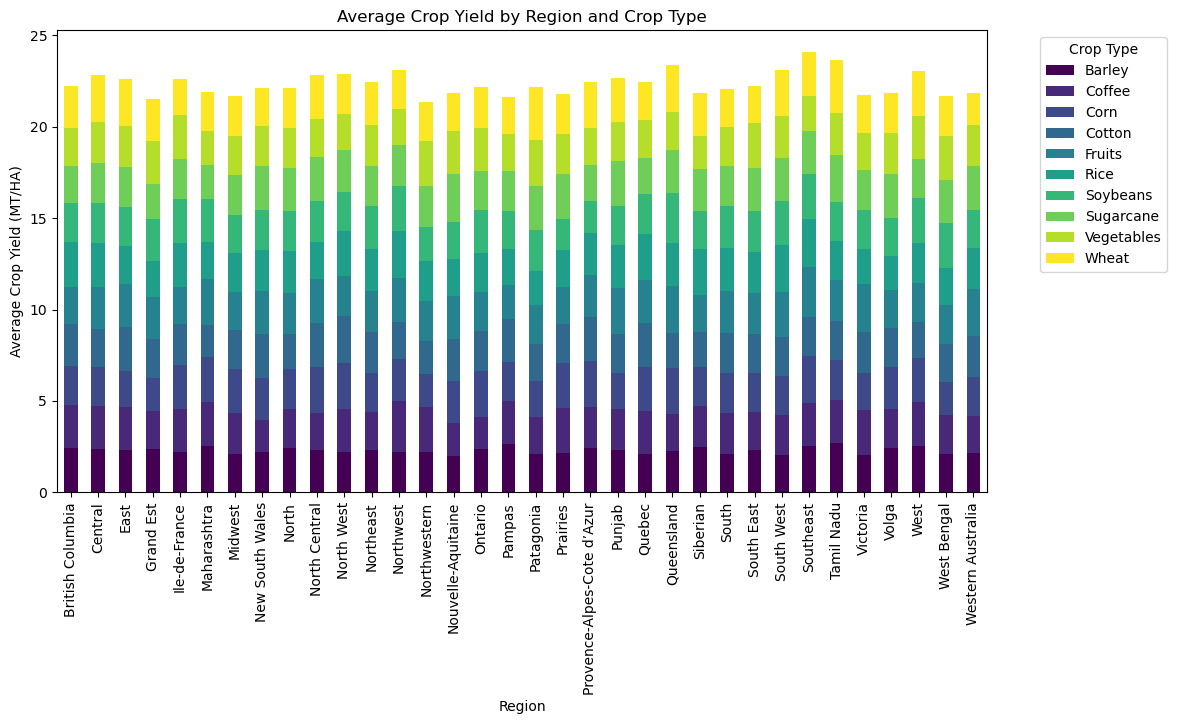

In [55]:
# Analysing the crop yields across different regions and crop types to understand geographical variations.
region_crop_yield = data.groupby(['Region', 'Crop_Type'])['Crop_Yield_MT_per_HA'].mean().unstack()
region_crop_yield.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Average Crop Yield by Region and Crop Type")
plt.xlabel("Region")
plt.ylabel("Average Crop Yield (MT/HA)")
plt.legend(title="Crop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#Regional Crop Yield Analysis: The bar graph highlights variations in average crop yields across different regions and crop types. Some regions consistently show higher yields, indicating potential differences in agricultural practices, climate, or resource availability. Wheat and sugarcane are prominently contributing to high yields in many regions.

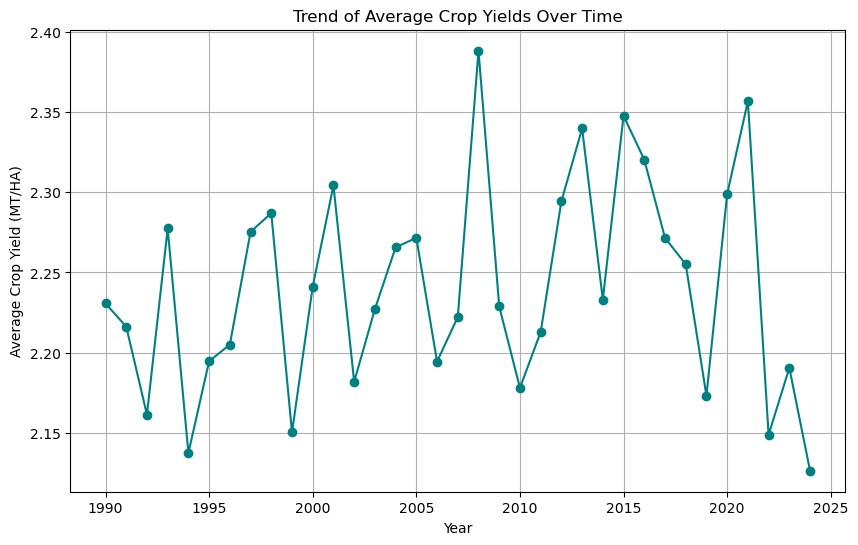

In [65]:
# Analysing trends in crop yields over the years (if the dataset includes a Year column).
if 'Year' in data.columns:
    yield_trends = data.groupby('Year')['Crop_Yield_MT_per_HA'].mean()
    yield_trends.plot(kind='line', marker='o', figsize=(10, 6), color='teal')
    plt.title("Trend of Average Crop Yields Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Crop Yield (MT/HA)")
    plt.grid(True)
    plt.show()
else:
    print("The dataset does not contain a 'Year' column for trend analysis.")




In [ ]:
#Line Chart (Average Crop Yield Over Time): The crop yield trend from 1990 to 2025 shows significant fluctuations. There are no consistent improvements, indicating potential issues such as climate variability, agricultural practices, or resource availability impacting yields.


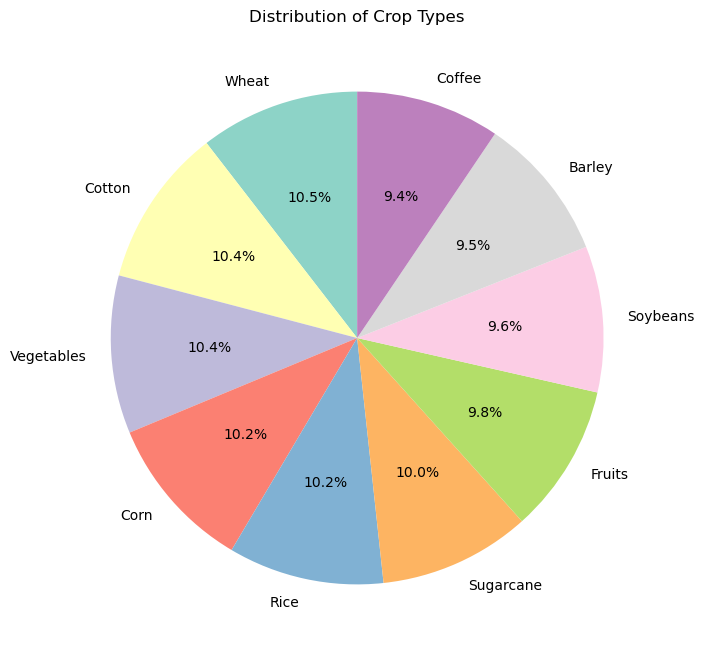

In [69]:
# Visualising the percentage distribution of different crop types in the dataset.

plt.figure(figsize=(8, 8))
data['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)
plt.title("Distribution of Crop Types")
plt.ylabel("")  # Remove y-label for aesthetics
plt.show()


In [ ]:
#Pie Chart (Crop Distribution): The crop distribution is relatively balanced, with wheat having the highest share (10.5%) and coffee the lowest (9.4%). This suggests diversification in crop production, reducing dependency on any single crop.


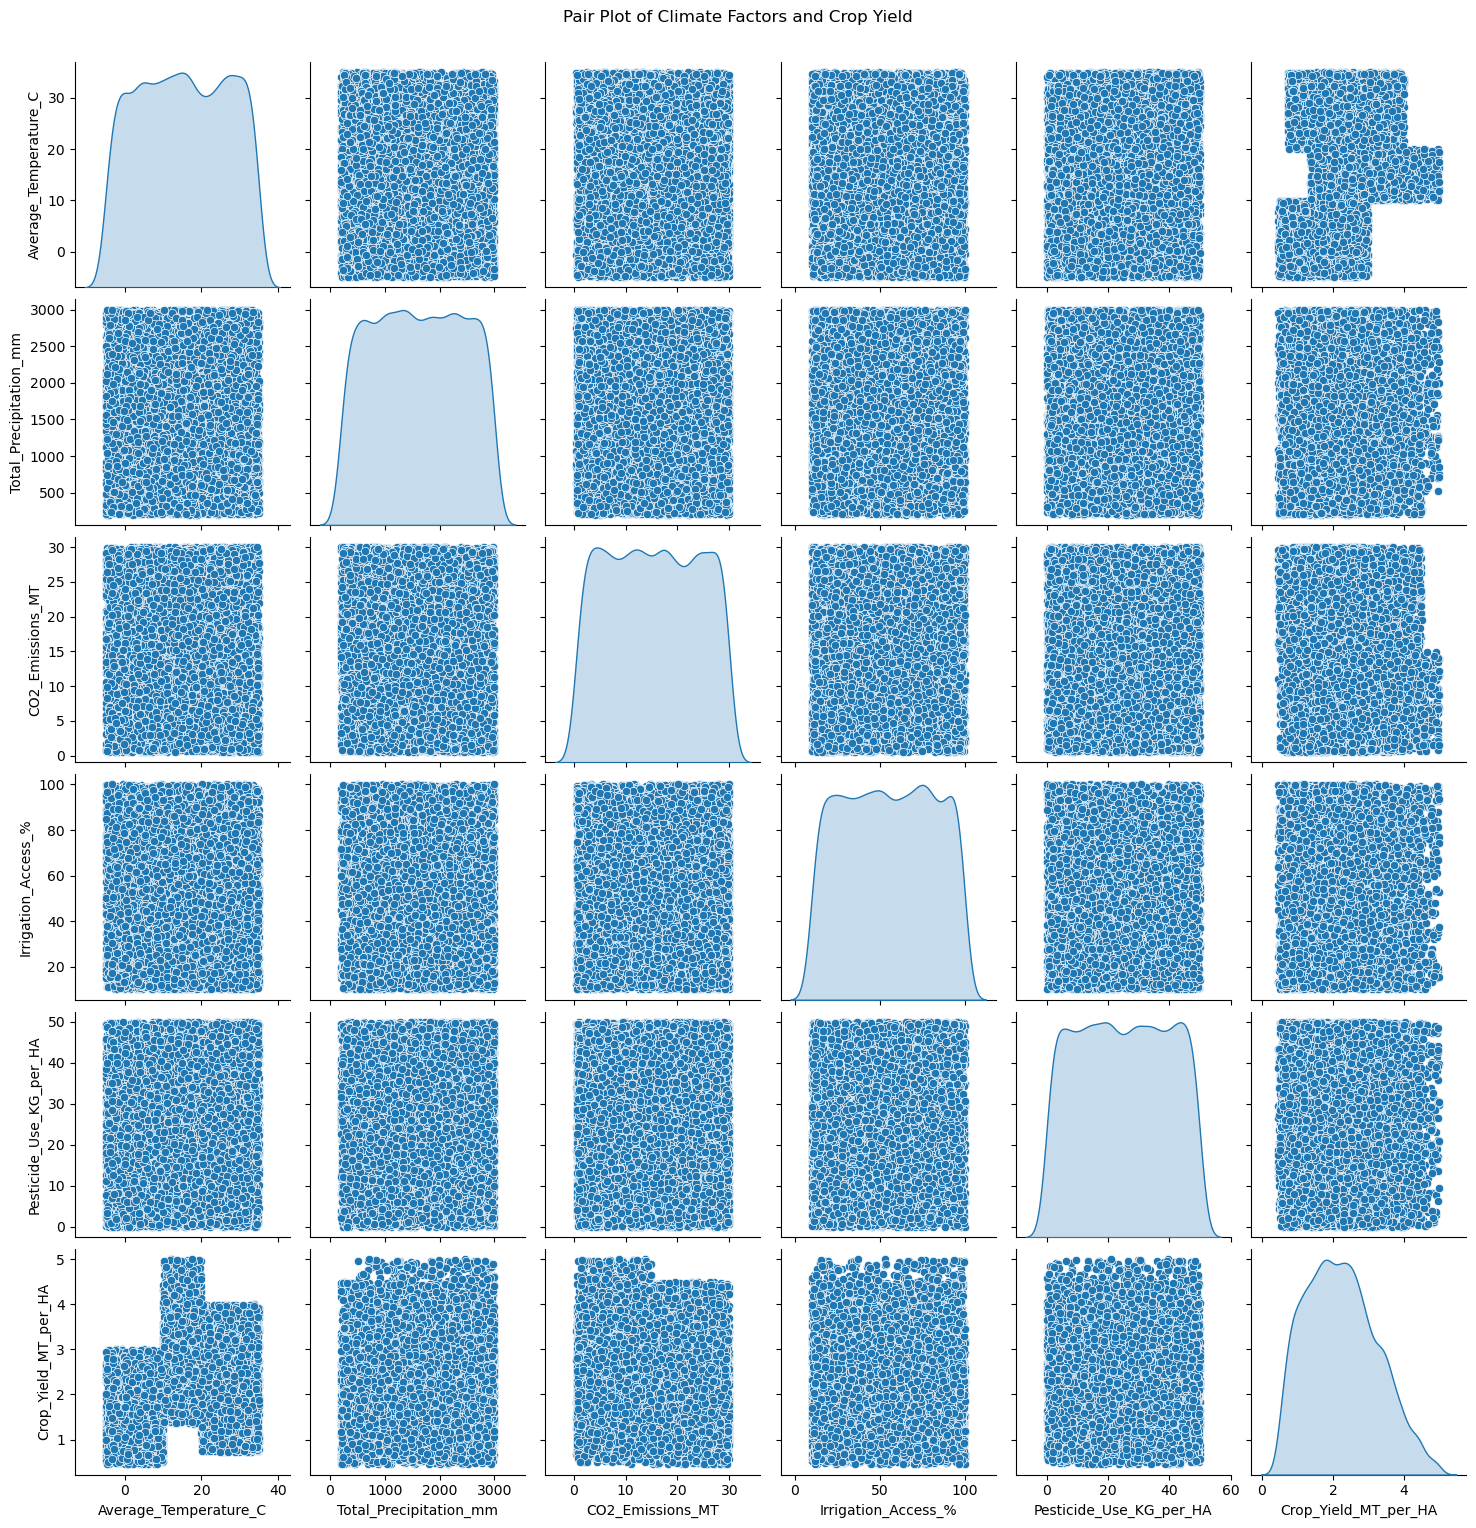

In [77]:
# Pair Plot: Climate Factors vs. Crop Yield
climate_factors = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
                   'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']

sns.pairplot(data[climate_factors], diag_kind='kde')  # Removed palette argument
plt.suptitle("Pair Plot of Climate Factors and Crop Yield", y=1.02)
plt.show()
